In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [3]:
nRowsRead = 2000 # specify 'None' if want to read whole file
# flights.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
flight_df = pd.read_csv('flights.csv', delimiter=',', nrows = nRowsRead)
flight_df.dataframeName = 'flights.csv'
nRow, nCol = flight_df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 2000 rows and 31 columns


In [4]:
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   AIRLINE              2000 non-null   object 
 5   FLIGHT_NUMBER        2000 non-null   int64  
 6   TAIL_NUMBER          1998 non-null   object 
 7   ORIGIN_AIRPORT       2000 non-null   object 
 8   DESTINATION_AIRPORT  2000 non-null   object 
 9   SCHEDULED_DEPARTURE  2000 non-null   int64  
 10  DEPARTURE_TIME       1872 non-null   float64
 11  DEPARTURE_DELAY      1872 non-null   float64
 12  TAXI_OUT             1872 non-null   float64
 13  WHEELS_OFF           1872 non-null   float64
 14  SCHEDULED_TIME       2000 non-null   int64  
 15  ELAPSED_TIME         1870 non-null   f

In [6]:
flight_df.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               2
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME          128
DEPARTURE_DELAY         128
TAXI_OUT                128
WHEELS_OFF              128
SCHEDULED_TIME            0
ELAPSED_TIME            130
AIR_TIME                130
DISTANCE                  0
WHEELS_ON               128
TAXI_IN                 128
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME            128
ARRIVAL_DELAY           130
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1872
AIR_SYSTEM_DELAY       1738
SECURITY_DELAY         1738
AIRLINE_DELAY          1738
LATE_AIRCRAFT_DELAY    1738
WEATHER_DELAY          1738
dtype: int64

In [7]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((flight_df.isnull().sum()  / flight_df.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [8]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
CANCELLATION_REASON,93.6
WEATHER_DELAY,86.9
LATE_AIRCRAFT_DELAY,86.9
AIRLINE_DELAY,86.9
SECURITY_DELAY,86.9
AIR_SYSTEM_DELAY,86.9
AIR_TIME,6.5
ARRIVAL_DELAY,6.5
ELAPSED_TIME,6.5
DEPARTURE_DELAY,6.4


In [9]:
# select columns having more than 40% missing values.
columnstodrop=df_missing[df_missing['Percentage'] > 40]
columnstodrop.index

Index(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], dtype='object')

In [10]:
# drop the columns which having more than 40% missing values
flight_df=flight_df.drop(columnstodrop.index,axis=1)

In [11]:
# check the missing value percentage 
df_missing=pd.DataFrame((flight_df.isnull().sum()  / flight_df.shape[0] *100).round(3),columns=['Percentage'])
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
ELAPSED_TIME,6.5
ARRIVAL_DELAY,6.5
AIR_TIME,6.5
TAXI_OUT,6.4
ARRIVAL_TIME,6.4
TAXI_IN,6.4
WHEELS_ON,6.4
DEPARTURE_TIME,6.4
DEPARTURE_DELAY,6.4
WHEELS_OFF,6.4


In [12]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   AIRLINE              2000 non-null   object 
 5   FLIGHT_NUMBER        2000 non-null   int64  
 6   TAIL_NUMBER          1998 non-null   object 
 7   ORIGIN_AIRPORT       2000 non-null   object 
 8   DESTINATION_AIRPORT  2000 non-null   object 
 9   SCHEDULED_DEPARTURE  2000 non-null   int64  
 10  DEPARTURE_TIME       1872 non-null   float64
 11  DEPARTURE_DELAY      1872 non-null   float64
 12  TAXI_OUT             1872 non-null   float64
 13  WHEELS_OFF           1872 non-null   float64
 14  SCHEDULED_TIME       2000 non-null   int64  
 15  ELAPSED_TIME         1870 non-null   f

In [13]:
flight_df.isnull().sum()

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
FLIGHT_NUMBER            0
TAIL_NUMBER              2
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME         128
DEPARTURE_DELAY        128
TAXI_OUT               128
WHEELS_OFF             128
SCHEDULED_TIME           0
ELAPSED_TIME           130
AIR_TIME               130
DISTANCE                 0
WHEELS_ON              128
TAXI_IN                128
SCHEDULED_ARRIVAL        0
ARRIVAL_TIME           128
ARRIVAL_DELAY          130
DIVERTED                 0
CANCELLED                0
dtype: int64

In [14]:
flight_df.TAIL_NUMBER.mode()

0    N484HA
1    N625MQ
dtype: object

In [15]:
flight_df['TAIL_NUMBER'].fillna('N484HA',inplace=True)

In [16]:
flight_df.isnull().sum()

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
FLIGHT_NUMBER            0
TAIL_NUMBER              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME         128
DEPARTURE_DELAY        128
TAXI_OUT               128
WHEELS_OFF             128
SCHEDULED_TIME           0
ELAPSED_TIME           130
AIR_TIME               130
DISTANCE                 0
WHEELS_ON              128
TAXI_IN                128
SCHEDULED_ARRIVAL        0
ARRIVAL_TIME           128
ARRIVAL_DELAY          130
DIVERTED                 0
CANCELLED                0
dtype: int64

In [17]:
#FILLNA USING COLUMNS MEAN
#flight_df.fillna(flight_df.mean(),inplace=True)

In [18]:
flight_df['DEPARTURE_TIME'].fillna(flight_df['SCHEDULED_DEPARTURE'],inplace=True)

In [19]:
flight_df['DEPARTURE_DELAY'].fillna(flight_df['DEPARTURE_DELAY'].mean(),inplace=True)

In [20]:
flight_df['TAXI_OUT'].fillna(flight_df['TAXI_OUT'].mean(),inplace=True)

In [21]:
flight_df['WHEELS_OFF'].fillna(flight_df['WHEELS_OFF'].mean(),inplace=True)

In [22]:
flight_df['SCHEDULED_TIME'].fillna(flight_df['SCHEDULED_TIME'],inplace=True)

In [23]:
flight_df['ELAPSED_TIME'].fillna(flight_df['ELAPSED_TIME'].mean(),inplace=True)

In [24]:
flight_df['AIR_TIME'].fillna(flight_df['AIR_TIME'].mean(),inplace=True)

In [25]:
flight_df['WHEELS_ON'].fillna(flight_df['WHEELS_ON'].mean(),inplace=True)

In [26]:
flight_df['TAXI_IN'].fillna(flight_df['TAXI_IN'].mean(),inplace=True)

In [27]:
flight_df['ARRIVAL_TIME'].fillna(flight_df['SCHEDULED_ARRIVAL'],inplace=True)

In [28]:
flight_df['ARRIVAL_DELAY'].fillna(flight_df['ARRIVAL_DELAY'].mean(),inplace=True)

In [29]:
flight_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [30]:
flight_df['DATE'] = ''
flight_df['DATE'] = pd.to_datetime(flight_df[['YEAR', 'MONTH', 'DAY']])

In [31]:
flight_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,1,1,4,OO,6458,N969SW,FAT,DEN,827,1251.0,264.0,13.0,1304.0,148,154.0,132.0,844,1616.0,9.0,1155,1625.0,270.0,0,0,2015-01-01
1996,2015,1,1,4,UA,792,N433UA,ORD,SNA,829,850.0,21.0,14.0,904.0,273,250.0,232.0,1726,1056.0,4.0,1102,1100.0,-2.0,0,0,2015-01-01
1997,2015,1,1,4,UA,1162,N36247,EWR,BOS,829,827.0,-2.0,12.0,839.0,80,61.0,43.0,200,922.0,6.0,949,928.0,-21.0,0,0,2015-01-01
1998,2015,1,1,4,B6,281,N247JB,JFK,HOU,829,822.0,-7.0,14.0,836.0,254,252.0,236.0,1428,1132.0,2.0,1143,1134.0,-9.0,0,0,2015-01-01


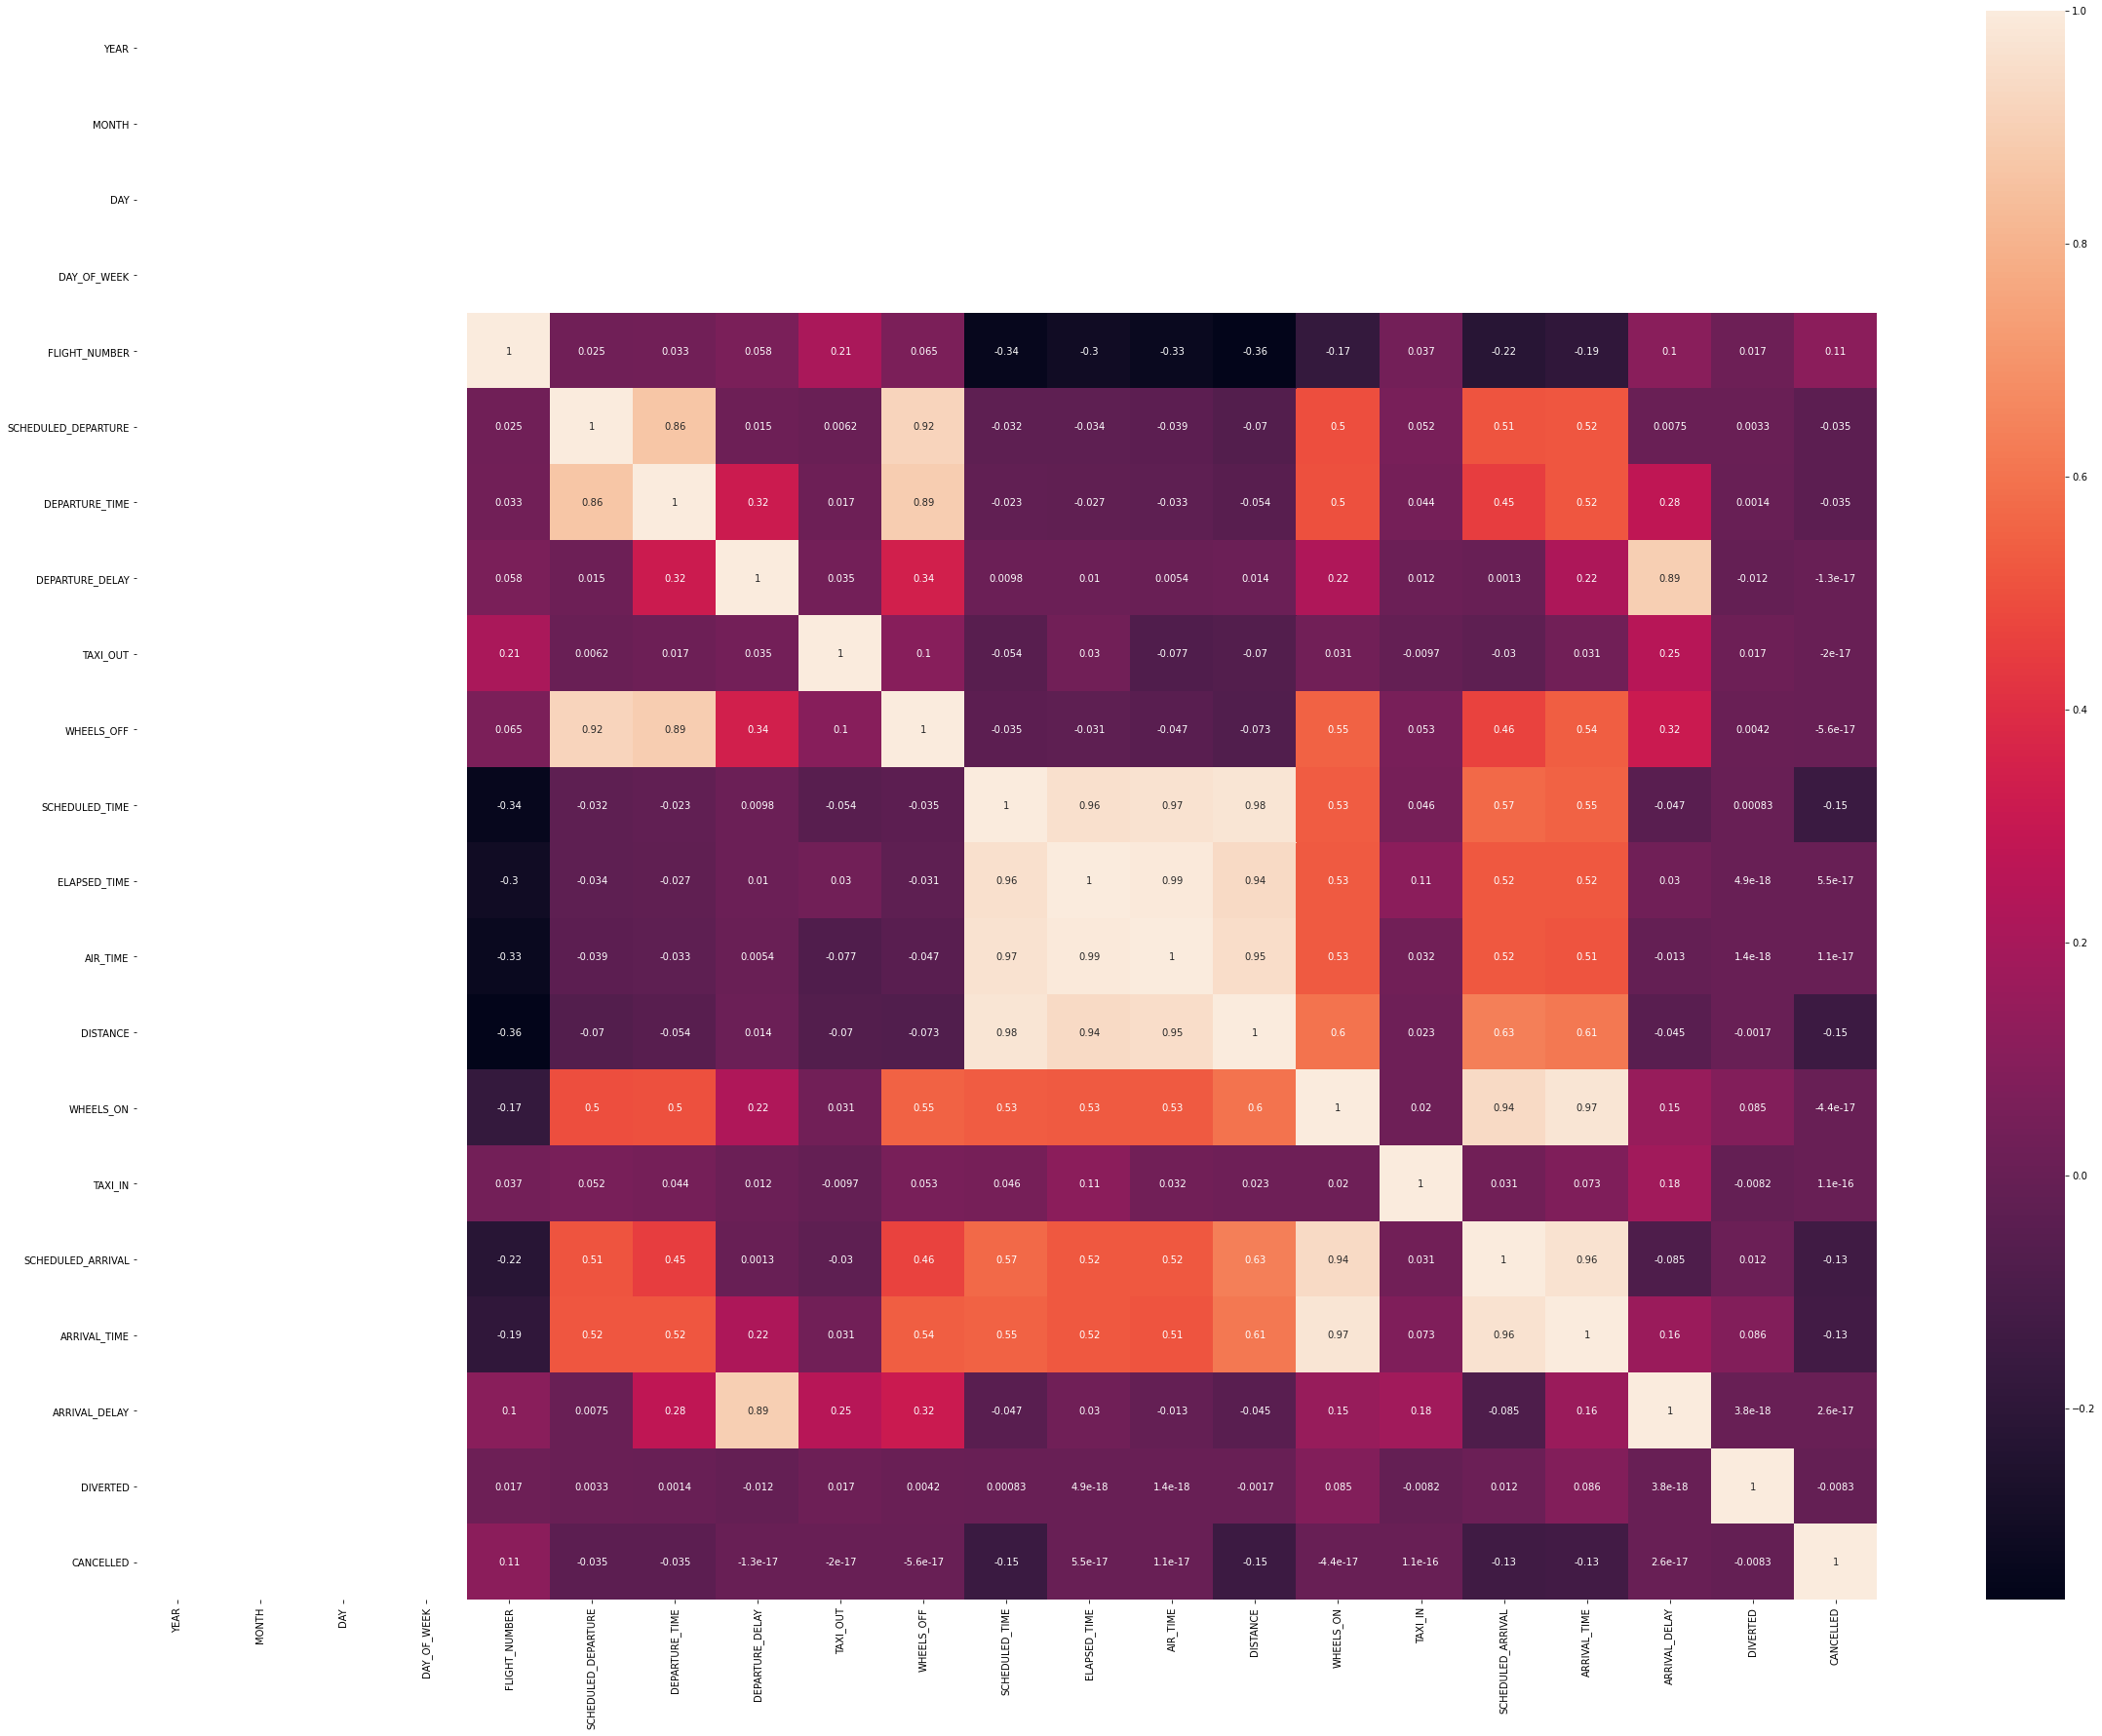

In [32]:
# ploting heat map to check correlation of numeric variables
plt.figure(figsize = (40,30))   
corr_matric= flight_df.corr()
sns.heatmap(corr_matric,annot=True,fmt='.2g')
plt.show()

 - Filter the dataset to eliminate columns that are'nt relevent for predictive modeling
 - Columns like:
     - AIRLINE
     - FLIGHT_NUMBER
     - TAIL_NUMBER
     - DEPARTURE_TIME
     - DEPARTURE_DELAY
     - TAXI_OUT
     - WHEELS_OFF
     - SCHEDULED_TIME
     - ELAPSED_TIME
     - AIR_TIME
     - DISTANCE
     - WHEELS_ON
     - TAXI_IN
     - SCHEDULED_ARRIVAL
     - ARRIVAL_TIME	
     - DIVERTED
     - CANCELLED

In [33]:
flight_df = flight_df.drop(["AIRLINE","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","DEPARTURE_DELAY","TAXI_OUT", 
                            "WHEELS_OFF","SCHEDULED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE","WHEELS_ON","TAXI_IN", 
                            "SCHEDULED_ARRIVAL","ARRIVAL_TIME","DIVERTED","AIR_TIME","CANCELLED"], axis = 1)

flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 2000 non-null   int64         
 1   MONTH                2000 non-null   int64         
 2   DAY                  2000 non-null   int64         
 3   DAY_OF_WEEK          2000 non-null   int64         
 4   ORIGIN_AIRPORT       2000 non-null   object        
 5   DESTINATION_AIRPORT  2000 non-null   object        
 6   SCHEDULED_DEPARTURE  2000 non-null   int64         
 7   ARRIVAL_DELAY        2000 non-null   float64       
 8   DATE                 2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 140.8+ KB


In [34]:
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE
0,2015,1,1,4,ANC,SEA,5,-22.0,2015-01-01
1,2015,1,1,4,LAX,PBI,10,-9.0,2015-01-01
2,2015,1,1,4,SFO,CLT,20,5.0,2015-01-01
3,2015,1,1,4,LAX,MIA,20,-9.0,2015-01-01
4,2015,1,1,4,SEA,ANC,25,-21.0,2015-01-01


In [35]:
#FEATURE GENERATION FROM ARRIVAL_DELAY, USING IF ELSE STATEMENT:
flight_df['RESULT']=flight_df['ARRIVAL_DELAY'].apply(lambda x: 1 if x>15 else 0)
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DATE,RESULT
0,2015,1,1,4,ANC,SEA,5,-22.0,2015-01-01,0
1,2015,1,1,4,LAX,PBI,10,-9.0,2015-01-01,0
2,2015,1,1,4,SFO,CLT,20,5.0,2015-01-01,0
3,2015,1,1,4,LAX,MIA,20,-9.0,2015-01-01,0
4,2015,1,1,4,SEA,ANC,25,-21.0,2015-01-01,0


In [36]:
flight_df.RESULT.value_counts()

0    1746
1     254
Name: RESULT, dtype: int64

In [37]:
flight_df.SCHEDULED_DEPARTURE.value_counts()

600    191
700    144
800    139
730     63
815     62
715     54
745     51
630     50
810     50
805     47
705     45
645     44
720     43
615     42
725     41
640     41
820     40
605     40
735     37
740     37
750     33
650     32
755     32
620     31
825     30
710     30
655     27
610     27
625     27
635     22
550     19
545     17
555     12
540      9
530      9
535      8
659      8
520      7
601      7
811      7
757      6
729      6
510      6
702      6
758      6
808      6
759      6
742      5
603      5
823      5
814      5
804      5
802      5
816      5
500      4
608      4
719      4
614      4
721      4
515      4
30       4
806      4
827      4
727      4
731      4
812      4
818      4
813      3
741      3
25       3
606      3
155      3
743      3
737      3
746      3
829      3
200      3
748      3
622      3
115      3
809      3
704      3
734      3
821      3
713      3
822      3
717      3
754      2
624      2
505      2
525      2

# Note:

 - Till this point Data Cleaning and Pre-processing of dataset - flights.csv has been done

In [38]:
w_df = pd.read_csv("weather2.csv")
w_df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,NaN,0.00,0.0,3.1,18,30,11,330,330.0,19.9,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,NaN,0.00,0.0,3.1,17,28,6,160,160.0,16.1,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,NaN,0.00,0.1,3.1,26,33,12,350,340.0,29.1,35.1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,NaN,0.00,0.0,3.1,5,12,-7,340,340.0,25.9,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,NaN,0.06,0.5,3.1,-7,1,-11,240,280.0,15.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [39]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   NAME     730 non-null    object 
 2   DATE     730 non-null    object 
 3   AWND     730 non-null    float64
 4   PGTM     0 non-null      float64
 5   PRCP     730 non-null    float64
 6   SNOW     365 non-null    float64
 7   SNWD     365 non-null    float64
 8   TAVG     730 non-null    int64  
 9   TMAX     730 non-null    int64  
 10  TMIN     730 non-null    int64  
 11  WDF2     730 non-null    int64  
 12  WDF5     725 non-null    float64
 13  WSF2     730 non-null    float64
 14  WSF5     725 non-null    float64
 15  WT01     240 non-null    float64
 16  WT02     8 non-null      float64
 17  WT03     50 non-null     float64
 18  WT04     4 non-null      float64
 19  WT05     0 non-null      float64
 20  WT06     4 non-null      float64
 21  WT08     143 non

In [40]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((w_df.isnull().sum()  / w_df.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [41]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
PGTM,100.000
WT05,100.000
WT06,99.452
WT04,99.452
WT09,99.315
WT02,98.904
WT03,93.151
WT08,80.411
WT01,67.123
SNOW,50.000


In [42]:
# select columns having more than 40% missing values.
columnstodrop=df_missing[df_missing['Percentage'] > 40]
columnstodrop.index

Index(['PGTM', 'SNOW', 'SNWD', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09'], dtype='object')

In [43]:
# drop the columns which having more than 40% missing values
w_df=w_df.drop(columnstodrop.index,axis=1)

In [44]:
# check the missing value percentage 
df_missing=pd.DataFrame((w_df.isnull().sum()  / w_df.shape[0] *100).round(3),columns=['Percentage'])
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
WDF5,0.685
WSF5,0.685
STATION,0.000
NAME,0.000
DATE,0.000
AWND,0.000
PRCP,0.000
TAVG,0.000
TMAX,0.000
TMIN,0.000


In [45]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  730 non-null    object 
 1   NAME     730 non-null    object 
 2   DATE     730 non-null    object 
 3   AWND     730 non-null    float64
 4   PRCP     730 non-null    float64
 5   TAVG     730 non-null    int64  
 6   TMAX     730 non-null    int64  
 7   TMIN     730 non-null    int64  
 8   WDF2     730 non-null    int64  
 9   WDF5     725 non-null    float64
 10  WSF2     730 non-null    float64
 11  WSF5     725 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 68.6+ KB


In [46]:
w_df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       5
WSF2       0
WSF5       5
dtype: int64

In [47]:
w_df['WSF5'].fillna(w_df['WSF5'].mean(),inplace=True)

In [48]:
w_df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       5
WSF2       0
WSF5       0
dtype: int64

In [49]:
w_df['WDF5'].fillna(w_df['WDF5'].mean(),inplace=True)

In [50]:
w_df.isnull().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
dtype: int64

In [51]:
w_df

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,0.00,18,30,11,330,330.0,19.9,25.9
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,0.00,17,28,6,160,160.0,16.1,19.0
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,0.00,26,33,12,350,340.0,29.1,35.1
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,0.00,5,12,-7,340,340.0,25.9,34.0
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,0.06,-7,1,-11,240,280.0,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-27,4.47,0.01,42,48,34,90,90.0,15.0,17.0
726,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-28,5.14,0.11,44,48,41,10,10.0,13.0,15.0
727,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-29,2.91,0.00,44,54,36,250,250.0,12.1,13.0
728,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-30,6.93,0.01,46,49,40,60,360.0,16.1,18.1


In [52]:
w_df.DATE

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
725    2015-12-27
726    2015-12-28
727    2015-12-29
728    2015-12-30
729    2015-12-31
Name: DATE, Length: 730, dtype: object

In [53]:
#object to datetime
w_df['DATE']= pd.to_datetime(w_df['DATE'])

In [54]:
w_df.DATE

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
725   2015-12-27
726   2015-12-28
727   2015-12-29
728   2015-12-30
729   2015-12-31
Name: DATE, Length: 730, dtype: datetime64[ns]

# Note:

 - Till this point Data Cleaning and Pre-processing of dataset - weather2.csv has been done

## MERGING

In [55]:
flight_df1=flight_df.sample(n=1000)

In [56]:
w_df

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-01,10.51,0.00,18,30,11,330,330.0,19.9,25.9
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-02,6.93,0.00,17,28,6,160,160.0,16.1,19.0
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-03,12.53,0.00,26,33,12,350,340.0,29.1,35.1
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-04,16.11,0.00,5,12,-7,340,340.0,25.9,34.0
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2015-01-05,7.16,0.06,-7,1,-11,240,280.0,15.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-27,4.47,0.01,42,48,34,90,90.0,15.0,17.0
726,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-28,5.14,0.11,44,48,41,10,10.0,13.0,15.0
727,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-29,2.91,0.00,44,54,36,250,250.0,12.1,13.0
728,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2015-12-30,6.93,0.01,46,49,40,60,360.0,16.1,18.1


In [57]:
final_df=pd.merge(flight_df1, w_df, how ='inner', on ='DATE')

In [58]:
final_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
ARRIVAL_DELAY          0
DATE                   0
RESULT                 0
STATION                0
NAME                   0
AWND                   0
PRCP                   0
TAVG                   0
TMAX                   0
TMIN                   0
WDF2                   0
WDF5                   0
WSF2                   0
WSF5                   0
dtype: int64

In [59]:
num_cols=final_df.select_dtypes(include='number').columns
cat_cols=final_df.select_dtypes(include='O').columns

In [60]:
num_cols

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'ARRIVAL_DELAY', 'RESULT', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], dtype='object')

In [61]:
cat_cols

Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'STATION', 'NAME'], dtype='object')

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 2000 non-null   int64         
 1   MONTH                2000 non-null   int64         
 2   DAY                  2000 non-null   int64         
 3   DAY_OF_WEEK          2000 non-null   int64         
 4   ORIGIN_AIRPORT       2000 non-null   object        
 5   DESTINATION_AIRPORT  2000 non-null   object        
 6   SCHEDULED_DEPARTURE  2000 non-null   int64         
 7   ARRIVAL_DELAY        2000 non-null   float64       
 8   DATE                 2000 non-null   datetime64[ns]
 9   RESULT               2000 non-null   int64         
 10  STATION              2000 non-null   object        
 11  NAME                 2000 non-null   object        
 12  AWND                 2000 non-null   float64       
 13  PRCP                 2000 non-nul

In [63]:
final_df.drop(columns=['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DATE'],axis=1,inplace=True)

In [64]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()

In [65]:
#final_df['STATION']=le.fit_transform(final_df['STATION'])
#final_df['NAME']=le.fit_transform(final_df['NAME'])

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   SCHEDULED_DEPARTURE  2000 non-null   int64  
 5   ARRIVAL_DELAY        2000 non-null   float64
 6   RESULT               2000 non-null   int64  
 7   STATION              2000 non-null   object 
 8   NAME                 2000 non-null   object 
 9   AWND                 2000 non-null   float64
 10  PRCP                 2000 non-null   float64
 11  TAVG                 2000 non-null   int64  
 12  TMAX                 2000 non-null   int64  
 13  TMIN                 2000 non-null   int64  
 14  WDF2                 2000 non-null   int64  
 15  WDF5                 2000 non-null   f

In [67]:
final_df.drop(columns=['ARRIVAL_DELAY'],axis=1,inplace=True)

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   SCHEDULED_DEPARTURE  2000 non-null   int64  
 5   RESULT               2000 non-null   int64  
 6   STATION              2000 non-null   object 
 7   NAME                 2000 non-null   object 
 8   AWND                 2000 non-null   float64
 9   PRCP                 2000 non-null   float64
 10  TAVG                 2000 non-null   int64  
 11  TMAX                 2000 non-null   int64  
 12  TMIN                 2000 non-null   int64  
 13  WDF2                 2000 non-null   int64  
 14  WDF5                 2000 non-null   float64
 15  WSF2                 2000 non-null   f

In [69]:
final_df.drop(columns=['STATION','NAME'],axis=1,inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2000 non-null   int64  
 1   MONTH                2000 non-null   int64  
 2   DAY                  2000 non-null   int64  
 3   DAY_OF_WEEK          2000 non-null   int64  
 4   SCHEDULED_DEPARTURE  2000 non-null   int64  
 5   RESULT               2000 non-null   int64  
 6   AWND                 2000 non-null   float64
 7   PRCP                 2000 non-null   float64
 8   TAVG                 2000 non-null   int64  
 9   TMAX                 2000 non-null   int64  
 10  TMIN                 2000 non-null   int64  
 11  WDF2                 2000 non-null   int64  
 12  WDF5                 2000 non-null   float64
 13  WSF2                 2000 non-null   float64
 14  WSF5                 2000 non-null   float64
dtypes: float64(5), int64(10)
memory usage:

In [70]:
final_df.describe(include='all')

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,RESULT,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
count,2000.0,2000.0,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,2015.0,1.0,1.0,4.0,681.704000,0.128000,9.505000,0.0,33.500000,42.500000,25.500000,190.000000,190.000000,1.990000e+01,24.450000
std,0.0,0.0,0.0,0.0,125.824426,0.334173,1.005251,0.0,15.503876,12.503126,14.503626,140.035013,140.035013,7.498101e-13,1.450363
min,2015.0,1.0,1.0,4.0,10.000000,0.000000,8.500000,0.0,18.000000,30.000000,11.000000,50.000000,50.000000,1.990000e+01,23.000000
25%,2015.0,1.0,1.0,4.0,615.000000,0.000000,8.500000,0.0,18.000000,30.000000,11.000000,50.000000,50.000000,1.990000e+01,23.000000
50%,2015.0,1.0,1.0,4.0,705.000000,0.000000,9.505000,0.0,33.500000,42.500000,25.500000,190.000000,190.000000,1.990000e+01,24.450000
75%,2015.0,1.0,1.0,4.0,754.000000,0.000000,10.510000,0.0,49.000000,55.000000,40.000000,330.000000,330.000000,1.990000e+01,25.900000
max,2015.0,1.0,1.0,4.0,830.000000,1.000000,10.510000,0.0,49.000000,55.000000,40.000000,330.000000,330.000000,1.990000e+01,25.900000


In [71]:
final_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,RESULT,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2015,1,1,4,30,0,10.51,0.0,18,30,11,330,330.0,19.9,25.9
1,2015,1,1,4,30,0,8.50,0.0,49,55,40,50,50.0,19.9,23.0
2,2015,1,1,4,730,0,10.51,0.0,18,30,11,330,330.0,19.9,25.9
3,2015,1,1,4,730,0,8.50,0.0,49,55,40,50,50.0,19.9,23.0
4,2015,1,1,4,755,1,10.51,0.0,18,30,11,330,330.0,19.9,25.9


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [75]:
final_df.shape

(2000, 15)

In [88]:
x = final_df.drop('RESULT', axis=1)
y = final_df[['RESULT']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 14)
(1600, 1)
(400, 14)
(400, 1)


In [89]:
print(y_train.mean())  #avg result rate in train and test data, should be comparable
print(y_test.mean())

RESULT    0.128125
dtype: float64
RESULT    0.1275
dtype: float64


In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [91]:
#base estimator = a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=100)

In [92]:
# fit the shallow decision tree
shallow_tree.fit(X_train, y_train)
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(y_pred)
print(score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.8725


In [93]:
# adaboost with the tree as base estimator
estimators= list(range(1,50,3))
abc_score = []
for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators=n_est, random_state=101)
    
    ABC.fit(X_train,y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    abc_score.append(score)

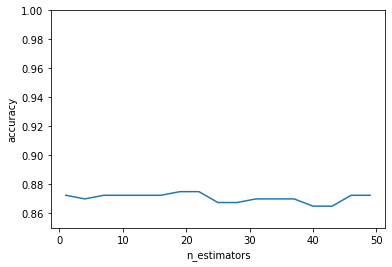

In [94]:
plt.plot(estimators, abc_score)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85,1])
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score,f1_score,auc


In [98]:
confusion_matrix(y_test, y_pred)

array([[346,   3],
       [ 48,   3]], dtype=int64)

               | Positive Prediction | Negative Prediction
Positive Class | True Positive (TP)  | False Negative (FN)
Negative Class | False Positive (FP) | True Negative (TN)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       349
           1       0.50      0.06      0.11        51

    accuracy                           0.87       400
   macro avg       0.69      0.53      0.52       400
weighted avg       0.83      0.87      0.83       400



In [101]:
#Precision = TruePositives / (TruePositives + FalsePositives)
prec = 346 / (346+48)
prec

0.8781725888324873

In [102]:
#Recall = TruePositives / (TruePositives + FalseNegatives)
rec = 346 / (346+3)
rec

0.9914040114613181